In [1]:
from utils import *

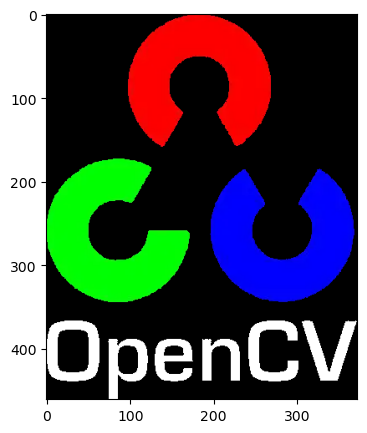

In [2]:
img1 = readImage('./input/opencv.png')
showImage(img1)

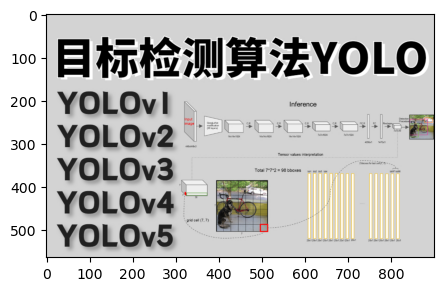

In [3]:
img2 = readImage('./input/test.png')
showImage(img2)


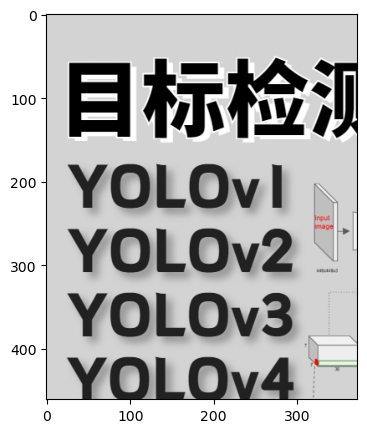

In [4]:
roi = img2[0:img1.shape[0], 0:img1.shape[1]]
showImage(roi)

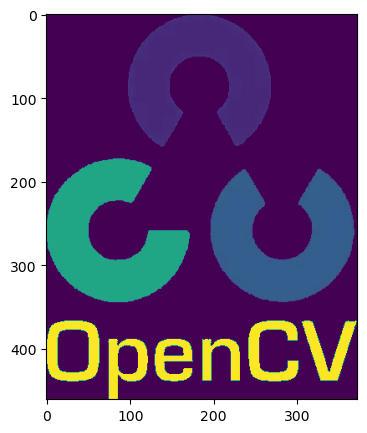

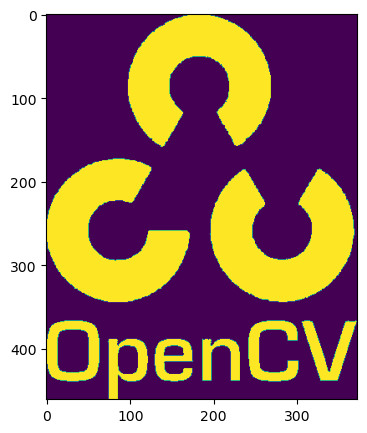

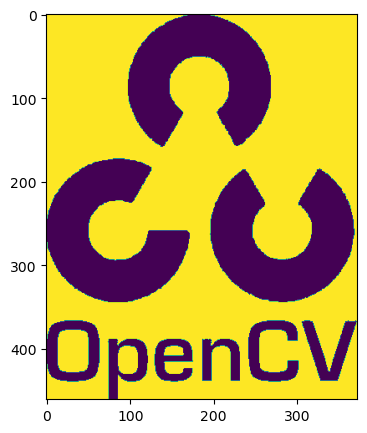

In [6]:
img1gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
showImage(img1gray)
ret, mask = cv.threshold(img1gray, 10, 255, cv.THRESH_BINARY)
showImage(mask)
mask_inv = cv.bitwise_not(mask)
showImage(mask_inv)


In [8]:
img1gray.shape

(461, 372)

In [9]:
roi.shape,mask_inv.shape

((461, 372, 3), (461, 372))

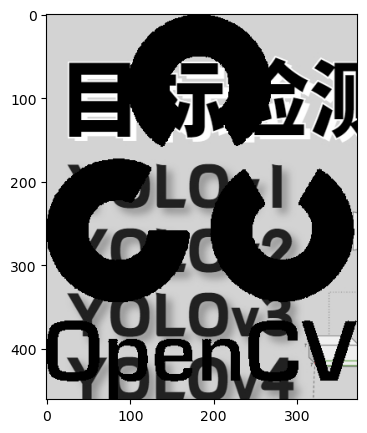

In [10]:
# 现在将ROI中logo的区域涂黑
img2_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
showImage(img2_bg)

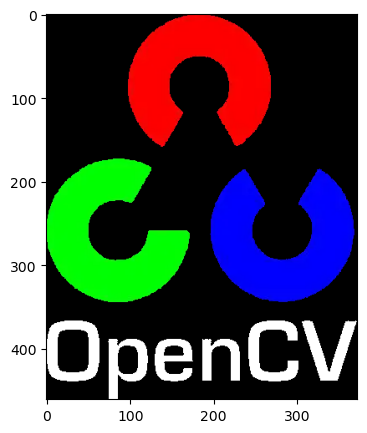

In [13]:
# 仅从logo图像中提取logo区域
img1_fg = cv.bitwise_and(img1,img1,mask = mask)
showImage(img1_fg)

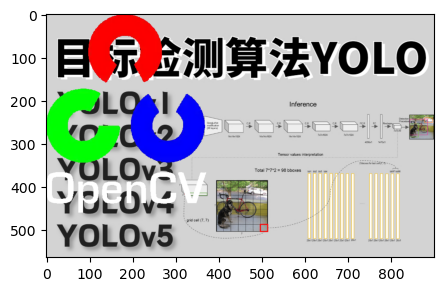

In [15]:
# 将logo放入ROI并修改主图像
dst = cv.add(img2_bg,img1_fg)
img2[0:img1.shape[0], 0:img1.shape[1] ] = dst
showImage(img2)